<h1><center> PPOL564 | DS1: Foundations </center><h1>
<h3><center> Lecture 22 <br><br><font color='grey'> 
Gradient Descent (Part 2)</font></center></h3>

## Concepts Covered:

- Gradient Descent on a Binary Outcome

In [1]:
import numpy as np
import pandas as pd
import sympy as sp
import requests
from bokeh.plotting import figure, output_notebook, show
from bokeh.layouts import column, row, gridplot
output_notebook()
sp.init_printing(use_unicode=True)

Loading BokehJS ...

Download Data from Github

In [2]:
def download_data(git_loc,dest_name):
    '''
    Download data from Github and save to the notebook's working directory.
    '''
    req = requests.get(git_loc)
    with open(dest_name,"w") as file:
        for line in req.text:
            file.writelines(line)
            
download_data('https://raw.githubusercontent.com/edunford/ppol564/master/lectures/lecture_22/test_data.csv',
         "test_data.csv")
download_data('https://raw.githubusercontent.com/edunford/ppol564/master/lectures/lecture_22/training_data.csv',
         "training_data.csv")

# Gradient Descent (Part 2)
## Binary Classification (Logistic Regression)

### Bernoulli Distribution : The likelihood of observing one state over another 

Many social science problems involve classifying states of the world (war/peace, voting, event occurrences, etc.). The **Bernoulli Distribution** (which is a special case of the binomial distribution) describes the distribution of two states (heads/tails). We'll describe the outcome in terms of 1 or 0 to describe the two states. $y \in [0,1]$

The [Bernoulli Distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution) is described as 

<br>
<br>

$$ p^y(1-p)^{1-y} $$

<br>
<br>

- $p^y \to $ the probability $y = 1$, we observe the phenomena
- $(1-p)^{1-y}  \to $ the probability $y = 0$, we don't observe the phenomena

Odds of something happening over not happening.

Our goal is to model that probability. We want to figure out the weights to maximize the probability of observing a 1 over a 0. Again, we can state the problem as minimizing the error, which maximizes the likelihood of observing the data. 

How can we model a probability? 

#### The logistic (sigmoid function)

Probabilities are unique. They are bounded between 0 and 1. Thus, we need a function that obeys such bounds. Luckily we have a range of functional forms to choose from. A function that maps a continuous value (a line) onto a probability distribution  is known as a "link function". We'll look at a specific kind of link function: the logistic or a sigmoid function.

Let's define the logistic function $\nu$ (sigmoid function) as 

<br>
<br>

$$ \nu(z) = \frac{1}{1+e^{-z}}  $$

<br>
<br>

$$ z = X\beta $$

<br>
<br>

Note that $z$ is our normal linear projection. $z(\cdot)$ maps our line to a probability space.

![](http://ericdunford.com/ppol670/Lectures/week_10/Figures/lin-to-pr-space.gif)

In [3]:
# Defining the logistic function...
def s(z):
    '''sigmoid function'''
    return 1/(1+np.exp(-z))


def ds(z):
    '''first-order derivative of the function'''
    return np.exp(-x)/(1 + np.exp(-x))**2

Let's get a feel for it's behavior and its first derivative.

In [4]:
x = np.arange(-7,7,.1) # Generate a numerical range
p = figure(height=300,width=700)
p.line(x,s(x),line_width=3,legend='logistic',alpha=.5)
p.line(x,ds(x),line_width=3,color="orange",
       alpha=.5,legend="df/dx logistic")
p.legend.location = "top_left"
show(p)

With this function, we can build a model for the probability.

<br>
<br>

$$ pr(y = 1) = \nu(z) $$

<br>
<br>

$$ \nu(z)^y(1-\nu(z))^{1-y} $$

<br>
<br>

#### Let's use some simulated data to walk through the optimization 

In [5]:
D = pd.read_csv("training_data.csv")
D.head()

,y,x1,x2
0,1.0,-1.085631,-0.748827
1,1.0,0.997345,0.567595
2,1.0,0.282978,0.718151
3,0.0,-1.506295,-0.999381
4,1.0,-0.578600,0.474898


In [6]:
# Outcome
y = D.y

# Generate design matrix.
X = np.column_stack([np.ones(D.shape[0]),D.x1,D.x2])
X[:5,:]

array([[ 1.        , -1.0856306 , -0.74882747],
       [ 1.        ,  0.99734545,  0.56759473],
       [ 1.        ,  0.2829785 ,  0.71815054],
       [ 1.        , -1.50629471, -0.99938075],
       [ 1.        , -0.57860025,  0.47489832]])

### The Likelihood

The **likelihood function** (each individual likelihood multiplied together) is 

<br>
<br>

$$ L = \prod_{i=1}^N \nu(z_{i})^{y_{i}}(1-\nu(z_i))^{1-y_i} $$

<br>
<br>

The **log likelihood** function is 

$$ l  = \sum_{i=1}^N  y_i log(\nu(z_i)) + (1-y_i)) log((1-\nu(z_i)))$$


<br>
<br>

When we **minimize** the average log likelihood function, we get our cost function...

<br>
<br>

$$ C = - \frac{1}{N} \sum_{i=1}^N  y_i log(\nu(z_i)) + (1-y_i) log((1-\nu(z_i)))$$

<br>
<br>

Let's get a feel the for this cost function behaves...

In [7]:
outcome = 1
pr = np.arange(.001,1,.001)
p = figure(height=400,width=400,title="y = 1")
p.line(pr,
       -outcome*np.log(pr),
       line_width=3,alpha=.5,
       legend='-y*log(pr)')

p.line(pr,
       -(1-outcome)*np.log(1-pr),
       line_width=3,alpha=.5,
       color = 'orange',
       legend='(1-y)*log(1-pr)')
p.xaxis.axis_label = "Est. Probability"
p.yaxis.axis_label = "Cost"

outcome = 0
p2 = figure(height=400,width=400,title="y = 0")
p2.line(pr,
       -outcome*np.log(pr),
       line_width=3,alpha=.5,
       legend='-y*log(pr)')

p2.line(pr,
       -(1-outcome)*np.log(1-pr),
       line_width=3,alpha=.5,
       color = 'orange',
       legend='(1-y)*log(1-pr)')
p2.xaxis.axis_label = "Est. Probability"
p2.yaxis.axis_label = "Cost"
p2.legend.location = "top_left"
show(row(p,p2))

Let's write a function to quickly compute the costs, given some randomly selected coefficients...

In [8]:
def cost(y,X,B):
    '''
    Cross-Entropy Cost
    '''
    z = X.dot(B)
    n = len(y)
    return -sum(y*np.log(s(z))+(1-y)*np.log(1-s(z)))/n

cost(y,X,B=np.array([0,0,0]))

Let's locate the gradient of the cost function with respect to our parameters/"weights", $\beta$.

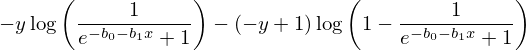

In [9]:
b0,b1,x,y_sym = sp.symbols('b0 b1 x y')
z_sym = b0 + b1*x
s_sym = 1/(1+sp.exp(-z_sym))
c = -y_sym*sp.log(s_sym)-(1-y_sym)*sp.log(1-s_sym)
c

Taking the derivative with respect to $\beta_0$ 

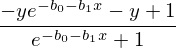

In [10]:
c.diff(b0).simplify()

<br>
<br>

$$ \frac{\partial C}{\partial \beta_0}= \frac{- y e^{- b_{0} - b_{1} x} - y + 1}{e^{- b_{0} - b_{1} x} + 1} $$

<br>
<br>

$$ \frac{-y(e^{- b_{0} - b_{1} x}+1)+1}{e^{- b_{0} - b_{1} x} + 1}$$

<br>
<br>

$$ \frac{-y(e^{- b_{0} - b_{1} x}+1)}{e^{- b_{0} - b_{1} x} + 1} + \frac{1}{e^{- b_{0} - b_{1} x} + 1}$$

<br>
<br>

$$ \frac{-y(e^{- b_{0} - b_{1} x}+1)}{e^{- b_{0} - b_{1} x} + 1} + \nu(z)$$

<br>
<br>

$$ \frac{\partial C}{\partial \beta_0}= \nu(z) -y$$

<br>
<br>

Now, the derivative with respect to $\beta_1$

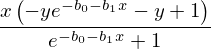

In [11]:
c.diff(b1).simplify()

<br>
<br>

$$\frac{\partial C}{\partial \beta_1}= \frac{x(- y e^{- b_{0} - b_{1} x} - y + 1)}{e^{- b_{0} - b_{1} x} + 1} $$

<br>
<br>

$$ x(\frac{-y(e^{- b_{0} - b_{1} x}+1)+1}{e^{- b_{0} - b_{1} x} + 1})$$

<br>
<br>

$$ x(\frac{-y(e^{- b_{0} - b_{1} x}+1)}{e^{- b_{0} - b_{1} x} + 1} + \frac{1}{e^{- b_{0} - b_{1} x} + 1})$$

<br>
<br>

$$ \frac{\partial C}{\partial \beta_1}= x(\nu(z)-y)$$

<br>
<br>

We now have everything we need to calculate the gradient of the cost function, and we can see that this cost function actually scale quite beautifully to a large number of inputs.

In [12]:
def calc_gradient(y,X,B):
    '''
    Calculate and average the gradient for every entry in the data.
    '''
    z = X.dot(B)
    n = len(y)
    grad = [sum(s(z)-y)/n ]
    for i in range(1,X.shape[1]):
        grad.append(sum(X[:,i]*(s(z)-y))/n)
    return np.array(grad)

Let's get a feel for both functions again.

In [13]:
B = np.array([1,1,1])
print(cost(y,X,B))
calc_gradient(y,X,B)

0.7846086172264121


array([ 0.04453159,  0.3665033 , -0.126092  ])

Now run the algorithm a number of times.

In [14]:
np.random.seed(123)
B = np.random.uniform(-1,1,3) # starting values
learning = 1
n_iter = 1000
stats = []
for i in range(n_iter):
    grad = calc_gradient(y,X,B)
    B = B - learning*grad
    
    # Store output values...
    stats.append(np.hstack([cost(y,X,B),B]))
    
stats = np.array(stats)

# Let's print out the resulting coefficients ("weights")
print(B)

[ 1.15205797 -2.20421918  3.15954845]


Let's visualize the gradient descent step...

In [15]:
p = figure(height=400,width=400)
p.xaxis.axis_label = "Iterations"
p.yaxis.axis_label = "Cross-Entropy"
p.line(np.arange(stats.shape[0]),stats[:,0],line_width=3)

p2 = figure(height=400,width=400)
p2.xaxis.axis_label = "Iterations"
p2.yaxis.axis_label = "Coeffients"
p2.line(np.arange(stats.shape[0]),stats[:,1],color="red",line_width=3,legend="B0")
p2.line(np.arange(stats.shape[0]),stats[:,2],color="orange",line_width=3,legend="B1")
p2.line(np.arange(stats.shape[0]),stats[:,3],color="pink",line_width=3,legend="B2")

show(row(p,p2))

### How well did we do?

In [16]:
import statsmodels.discrete.discrete_model as sm
sm.Logit(y,X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.284319
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Tue, 19 Nov 2019   Pseudo R-squ.:                  0.5689
Time:                        17:44:14   Log-Likelihood:                -284.32
converged:                       True   LL-Null:                       -659.49
                                        LLR p-value:                1.167e-163
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1521      0.121      9.541      0.000       0.915       1.389
x1            -2.2042      0.169    -13.065      0.000      -2.535      -1.874
x2             3.1595      0.218     14.463      0.000       2.731       3.588
==============================================================================
"""

### How well can we predict future values (i.e. new data that we didn't learn on)?

In [17]:
D_test = pd.read_csv("test_data.csv")

# Outcome
y_test = D_test.y

# Generate design matrix.
X_test = np.column_stack([np.ones(D_test.shape[0]),D_test.x1,D_test.x2])
X_test[:5,:]

array([[ 1.        ,  0.43673466, -1.65848742],
       [ 1.        ,  0.20579458, -2.07998446],
       [ 1.        ,  0.11082226,  0.5694471 ],
       [ 1.        , -0.68799224,  0.51801639],
       [ 1.        , -1.49774878,  1.10036964]])

First, note that our coefficients weight our data in a way that minimizes the costs and maximizes the likelihood. We can used these weights to predict new data entries, which are contained in our test dataset. 

In [18]:
probs = s(X_test.dot(B))
probs[:10].round(2)

array([0.01, 0.  , 0.94, 0.99, 1.  , 0.97, 0.9 , 0.  , 0.14, 0.88])

This will give us probabilities that we can then convert into real values by choosing an arbitrary threshold.

In [19]:
prediction = probs >= .5
prediction = prediction.astype("int")
prediction[:10]

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [21]:
# Accuracy: How many ones did we predict that were actual ones?
sum(prediction == y_test)/len(y_test)